Data Analytics II - Assignment 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/DSBDA/ads.csv")

**Load Data**

In [ ]:
df.shape

(400, 5)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop(['User ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


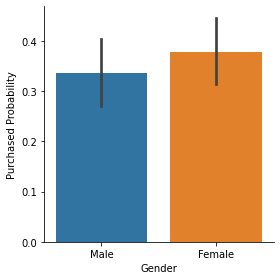

In [ ]:
g = sns.catplot(x = "Gender", y = "Purchased", data=df, kind="bar", height=4)
g.set_ylabels("Purchased Probability")
plt.show()

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


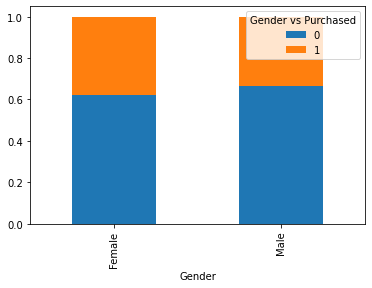

In [ ]:
M2 = pd.crosstab(df.Gender, df.Purchased, normalize="index")
print(M2)
M2.plot.bar(figsize=(6,4), stacked=True)
plt.legend(title="Gender vs Purchased", loc="upper right")
plt.show()

(3, 3)


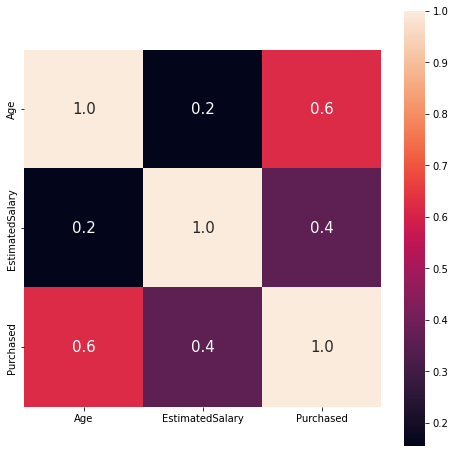

In [ ]:
#df = pd.get_dummies(df, columns=['Gender'])
corr = df.corr()
print(corr.shape) 
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':15})
plt.show()

In [ ]:
X = df.drop(['Purchased'], axis=1)
Y = df['Purchased']
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Testing Split Successful")

Training Testing Split Successful


**Noramlize The Data using MinMax Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X=df[['Age', 'EstimatedSalary']]
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print("Training And Testing Split Was Successful")

Training And Testing Split Was Successful
